# 2.1 SOO for 2D scalar field

We load the stored true fields that we read in chapter 1 of the manual. We also load the graph manager to display the results.

We get the boundaries of the field, and make sure that sensors can't be placed at the very edge but must be placed at least 2mm away.

In [1]:
import sys
sys.path.insert(0,'/home/cbyers/projects/working_branches/cyclops/src')
import numpy as np
from cyclops.object_reader import PickleManager
from cyclops.plotting import PlotManager

# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = PlotManager()
true_temp_field = pickle_manager.read_file("results/temp_plane_field.pickle")
grid = pickle_manager.read_file("results/temp_plane_points.pickle")

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds + np.array([[1, 1], [-1, -1]]) * 0.002

We use the symmetry manager to force any assumptions about planes of symmetry that we might make.

We then setup the sensor suite, and you can uncomment the code below to find out how to use a MultiSensor (that finds the value at many points - like a DIC or an IR camera).

In [2]:
# Setup the symmetry
from cyclops.fields import ScalarField
from cyclops.regressors import RBFModel
from cyclops.sensor_suite import SensorSuite, SymmetryManager
from cyclops.sensors import RoundSensor


symmetry_manager = SymmetryManager()
symmetry_manager.set_2D_x(np.mean(field_bounds[:, 0]))


# Setup the sensor suite
def f(x):
    return np.zeros(x.shape)


sensor = RoundSensor(0, f, 0, np.array([[-5000], [5000]]), 0, 2)
sensors = np.array([sensor] * 5)

# def f(x): return np.zeros(x.shape)
# sensor = MultiSensor(0, f, 0.1, np.array([[-5000], [5000]]), np.linspace(sensor_bounds[0, 0], sensor_bounds[1, 0], 10).reshape(-1, 2))
# sensors = np.array([sensor])

sensor_suite = SensorSuite(
    ScalarField(RBFModel, field_bounds),
    sensors,
    symmetry=[symmetry_manager.reflect_2D_horiz],
)

We define the optimiser. You can change up the parameters including the time it takes to optimise for, and the type of optimiser (GAOptimiser is the only other SOO optimiser). Also look at the optional arguments you can use - for instance specifying how many cores you want the optimisation to run on in the plan_soo function.

In [3]:
# Setup the experiment
from cyclops.experiment import Experiment
from cyclops.optimisers import PSOOptimiser


optimiser = PSOOptimiser("00:00:10")
experiment = Experiment(true_temp_field, grid, optimiser)
experiment.plan_soo(sensor_suite, sensor_bounds)
res = experiment.design()
(
    proposed_layout,
    true_temps,
    model_temps,
    sensor_values,
) = experiment.get_SOO_plotting_arrays(res.X)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

                                        



fit_model, known_posfit_model, known_posfit_model, known_posfit_model, known_pos              <class 'numpy.ndarray'>          <class 'numpy.ndarray'><class 'numpy.ndarray'><class 'numpy.ndarray'>

          

          
          
fit_model, known_pos                    


          fit_model, known_pos

 fit_model, known_posfit_model, known_pos
fit_model, known_scalars fit_model, known_scalarsfit_model, known_scalars <class 'numpy.ndarray'>  fit_model, known_scalars<class 'numpy.ndarray'>  <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'><class 'numpy.ndarray'>

          <class 'numpy.ndarray'>
          
          

                    


          fit_model, known_scalars          

      

<cyclops.regressors.RBFModel object at 0x7fcec9609750>fit_model, known_pos


<cyclops.regressors.RBFModel object at 0x7fceca1ce590><cyclops.regressors.RBFModel object at 0x7fcecafae550> <class 'numpy.ndarray'>

                     
fit_model, known_pos
 <class 'numpy.ndarray'><class 'numpy.ndarray'>fit_model, known_pos          

                              


fit_model, known_pos           fit_model, known_scalars

fit_model, known_scalars <class 'numpy.ndarray'><class 'numpy.ndarray'>
 
          <class 'numpy.ndarray'>
fit_model, known_scalars           

<class 'numpy.ndarray'>fit_model, known_scalars

 fit_model, known_scalars fit_model, known_pos<class 'numpy.ndarray'><class 'numpy.ndarray'>
          
          
                      <class 'numpy.ndarray'>
About to attempt regressor.fitAbout to attempt regressor.fit

<class 'numpy.ndarray'>

          

          
          

About to attempt regressor.fit
          
<cyclops.regressors.RBFModel object at 0x7fcec9578490>Abou

fit_model, known_pos          
fit_model, known_scalarsfit_model, known_pos            <cyclops.regressors.RBFModel object at 0x7fcec960b710>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
           <class 'numpy.ndarray'>
          


About to attempt regressor.fit
<class 'numpy.ndarray'>

          
          fit_model, known_pos
           fit_model, known_scalars          fit_model, known_pos           
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


          


<class 'numpy.ndarray'>          fit_model, known_scalarsfit_model, known_scalars
            
<class 'numpy.ndarray'>About to attempt regressor.fit
fit_model, known_scalars<class 'numpy.ndarray'> <class 'numpy.ndarray'>

About to attempt regressor.fit
          


About to attempt regressor.fit          fit_model, known_scalars           



<class 'numpy.ndarray'>
About to attempt regressor.fit

<cyclops.regressors.RBFModel object at 0x7fcec9634d90>About to attempt regressor.fit
          

                          

fit_model, known_scalars<class 'numpy.ndarray'>fit_model, known_pos

           

<class 'numpy.ndarray'>


 About to attempt regressor.fit<class 'numpy.ndarray'>

          fit_model, known_scalars
 
          About to attempt regressor.fit

                              
<class 'numpy.ndarray'>
                    
About to attempt regressor.fitfit_model, known_pos fit_model, known_scalars 
<class 'numpy.ndarray'>


          <class 'numpy.ndarray'>          


fit_model, known_scalarsAbout to attempt regressor.fitfit_model, known_pos 

 
<class 'numpy.ndarray'><cyclops.regressors.RBFModel object at 0x7fcec8e84d90>
          

About to attempt regressor.fit
          
          About to attempt regressor.fit
          
<class 'numpy.ndarray'>
          
fit_model, known_pos
fit_model, known_pos  
<cyclops.regressors.RBFModel object at 0x7fcec8e85510><class 'numpy.ndarray'><class 'numpy.ndarray'>



                              
fit_model, known_scalars
fit_model, known_scalars
 <cla

<class 'numpy.ndarray'>          


fit_model, known_scalars
 
<cyclops.regressors.RBFModel object at 0x7fcec8e8b850><class 'numpy.ndarray'>


          
                    
About to attempt regressor.fit
fit_model, known_pos
About to attempt regressor.fit                    fit_model, known_scalars

 
fit_model, known_scalars          fit_model, known_pos <cyclops.regressors.RBFModel object at 0x7fcec8e8db90> 
<class 'numpy.ndarray'><class 'numpy.ndarray'> <class 'numpy.ndarray'>


                    <class 'numpy.ndarray'>
fit_model, known_scalars
 <class 'numpy.ndarray'>
          
About to attempt regressor.fit
          

About to attempt regressor.fit
          
fit_model, known_scalars
           
<class 'numpy.ndarray'><cyclops.regressors.RBFModel object at 0x7fcec8e7b110>          
fit_model, known_pos
                    

 About to attempt regressor.fit<class 'numpy.ndarray'>

About to attempt regressor.fitfit_model, known_pos 

                    

          fit_model, k

                    

          fit_model, known_scalars
 <cyclops.regressors.RBFModel object at 0x7fcec8e7b2d0><class 'numpy.ndarray'>


<cyclops.regressors.RBFModel object at 0x7fcec97e1b50><cyclops.regressors.RBFModel object at 0x7fceca1ce850>

                    
          
fit_model, known_posAbout to attempt regressor.fit
                    

          
 <cyclops.regressors.RBFModel object at 0x7fcecafae550>fit_model, known_pos
 <class 'numpy.ndarray'>

          fit_model, known_pos
<class 'numpy.ndarray'>fit_model, known_scalars 
          <class 'numpy.ndarray'> 

<class 'numpy.ndarray'>          fit_model, known_pos          fit_model, known_pos
fit_model, known_scalars
           
 fit_model, known_pos<class 'numpy.ndarray'> <class 'numpy.ndarray'> 
<class 'numpy.ndarray'><class 'numpy.ndarray'>          

          
                    


                    About to attempt regressor.fit


About to attempt regressor.fit          fit_model, known_scalars 



fit_model, kn

           <cyclops.regressors.RBFModel object at 0x7fcef4686550><class 'numpy.ndarray'>fit_model, known_pos

          
fit_model, known_pos           
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
fit_model, known_scalars          
fit_model, known_scalars
 

 <class 'numpy.ndarray'>About to attempt regressor.fit           <class 'numpy.ndarray'>

                    

About to attempt regressor.fit

          fit_model, known_scalars
About to attempt regressor.fit

                    

<cyclops.regressors.RBFModel object at 0x7fcec8e862d0><cyclops.regressors.RBFModel object at 0x7fcec8e93a90>

About to attempt regressor.fit<cyclops.regressors.RBFModel object at 0x7fcec9037050> <class 'numpy.ndarray'><class 'numpy.ndarray'>

          
About to attempt regressor.fit

                    

<cyclops.regressors.RBFModel object at 0x7fcf479b4750>About to attempt regressor.fit
          

          
                    

<cyclops.regressors.RBFModel object at 0x7fcec8e8ae10><cyclops.re

fit_model, known_scalars <cyclops.regressors.RBFModel object at 0x7fcec8ea6cd0><class 'numpy.ndarray'>
fit_model, known_pos           

<class 'numpy.ndarray'><cyclops.regressors.RBFModel object at 0x7fcec8e8de10>
fit_model, known_scalars
  <class 'numpy.ndarray'>
          
<class 'numpy.ndarray'>          
fit_model, known_pos
fit_model, known_scalars            <class 'numpy.ndarray'>
<class 'numpy.ndarray'>
                    About to attempt regressor.fit
          

          

About to attempt regressor.fitfit_model, known_pos 

          About to attempt regressor.fit
<class 'numpy.ndarray'>          


          fit_model, known_scalars<cyclops.regressors.RBFModel object at 0x7fcec8e78f50> 
<class 'numpy.ndarray'>          


                    
About to attempt regressor.fit
          
          
fit_model, known_scalars
fit_model, known_pos<class 'numpy.ndarray'>

          
<cyclops.regressors.RBFModel object at 0x7fcec8eaad90>About to attempt regressor.fit
 fit_model, kn

           <class 'numpy.ndarray'>

fit_model, known_scalars          About to attempt regressor.fit
           fit_model, known_scalarsfit_model, known_scalars
           
 <class 'numpy.ndarray'><class 'numpy.ndarray'>
fit_model, known_scalars

          <class 'numpy.ndarray'>

 About to attempt regressor.fit
                    
About to attempt regressor.fit

<class 'numpy.ndarray'>

fit_model, known_pos

<cyclops.regressors.RBFModel object at 0x7fcec9634450> About to attempt regressor.fit          <class 'numpy.ndarray'>


About to attempt regressor.fit          



          
fit_model, known_scalars          
          
fit_model, known_pos <class 'numpy.ndarray'>
          fit_model, known_pos 
fit_model, known_scalars  <class 'numpy.ndarray'><class 'numpy.ndarray'>

<class 'numpy.ndarray'>                    


About to attempt regressor.fitAbout to attempt regressor.fit

                    

<cyclops.regressors.RBFModel object at 0x7fcec8ea6810><cyclops.regressors.RBFModel 

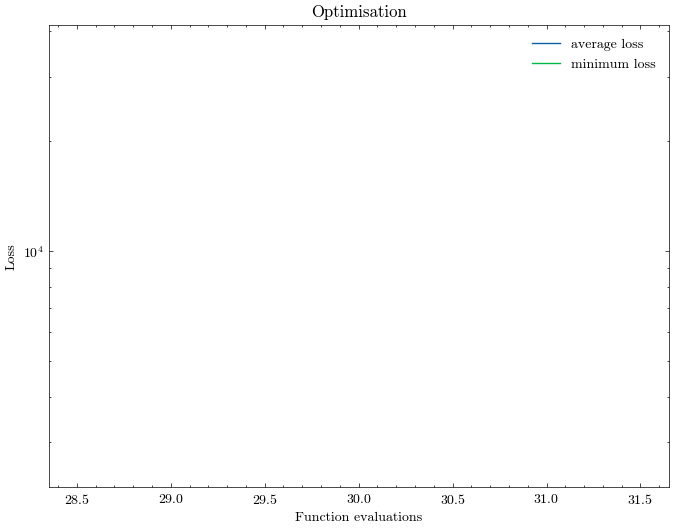

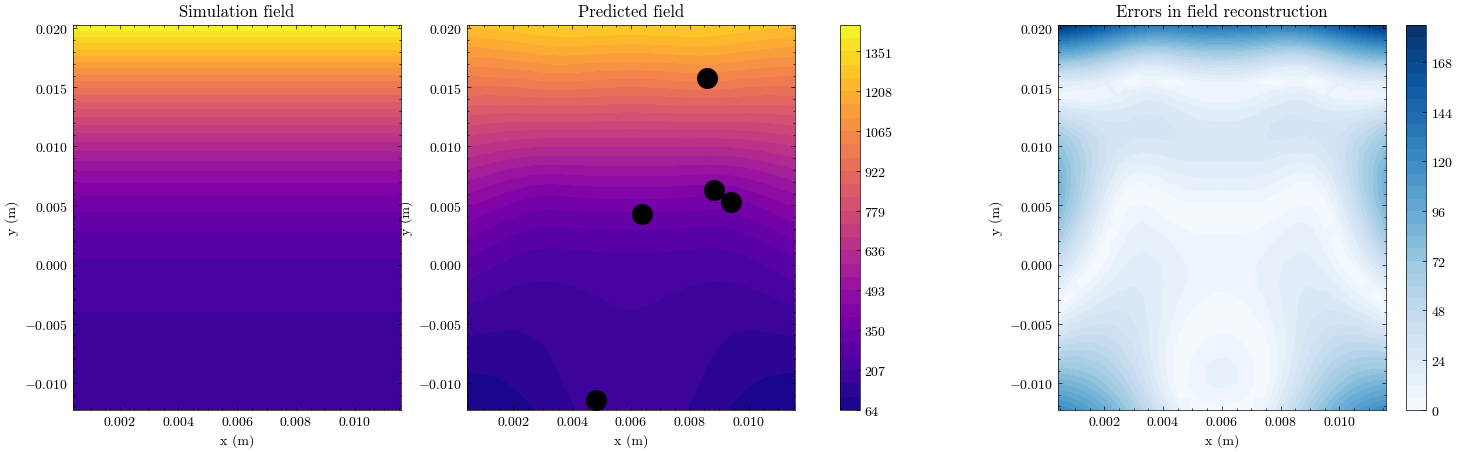

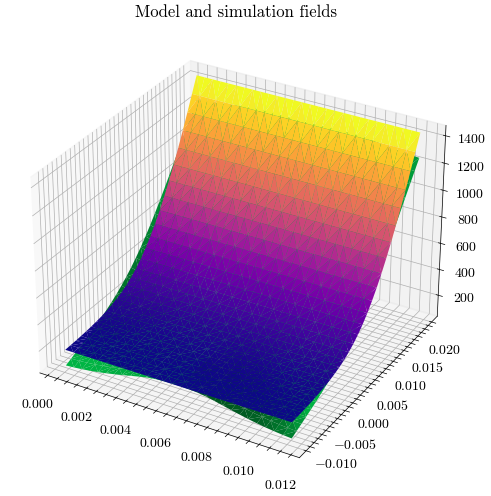

In [4]:
# Display the results
graph_manager.build_optimisation(res.history)
graph_manager.draw()
graph_manager.build_2D_compare(grid, proposed_layout, true_temps, model_temps)
graph_manager.draw()
graph_manager.build_3D_compare(grid, true_temps, model_temps)
graph_manager.draw()